# AML Lab Assignment 5


## Import Library

In [1]:
!pip install adversarial-robustness-toolbox

     |████████████████████████████████| 1.3 MB 24.3 MB/s 
     |████████████████████████████████| 3.3 MB 58.0 MB/s 
     |████████████████████████████████| 34.5 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [2]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import sys
import PIL
from PIL import Image
from matplotlib.pyplot import figure

import torch.nn as nn 
from PIL import Image
from torchvision import transforms
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt 
from art.estimators.classification import PyTorchClassifier
import warnings
warnings.filterwarnings('ignore') 

import scipy.signal

In [3]:
from tensorflow.keras.applications.resnet50 import decode_predictions

In [4]:
def softmax_activation(inputs): 
    inputs = inputs.tolist()
    exp_values = np.exp(inputs - np.max(inputs)) 
    
    # Normalize 
    probabilities = exp_values / np.sum(exp_values)
    return probabilities 

In [5]:
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
]) 

In [6]:
model_resnet50 = models.resnet50(pretrained=True) 

criterion = nn.CrossEntropyLoss()

# Create the ART classifier

classifier = PyTorchClassifier(
    model=model_resnet50,
    loss=criterion,
    input_shape=(3, 224, 224),
    nb_classes=1000,
    device_type='gpu'
)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [16]:
print("..................Code developed By Shaikh Faizan Ahmed and Sonam Bharti.............")
print()

..................Code developed By Shaikh Faizan Ahmed and Sonam Bharti.............



## Gaussian Noise Attack

In [7]:
img = cv2.imread('/content/flower1.jpg')

(-0.5, 499.5, 385.5, -0.5)

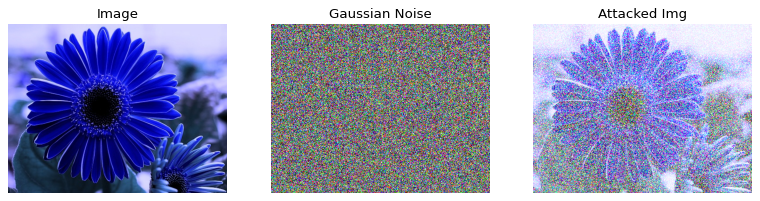

In [8]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(331)
plt.imshow(img)
plt.title('Image')
plt.axis('off')


# Generate Gaussian noise
gauss = np.random.normal(1,20,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

plt.subplot(332)
plt.imshow(gauss)
plt.title('Gaussian Noise')
plt.axis('off')


# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)

plt.subplot(333)
plt.imshow(img_gauss)
plt.title('Attacked Img')
plt.axis('off')


In [9]:
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_image = Image.fromarray(color_coverted)

input_tensor = preprocess(original_image)
input_batch = input_tensor.unsqueeze(0).numpy().astype(np.float32)
input = input_batch[0].transpose((1,2,0))


color_coverted = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
adv_image = Image.fromarray(color_coverted)

input_tensor = preprocess(adv_image)
input_batch1 = input_tensor.unsqueeze(0).numpy().astype(np.float32)
adv_input = input_batch1[0].transpose((1,2,0))

49152/35363 [=========================================] - 0s 0us/step


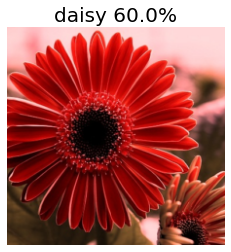

In [10]:
label = decode_predictions(classifier.predict(input_batch))
label = label[0][0]

preds = classifier.predict(input_batch)

accuracy = np.max(softmax_activation(preds), axis=1)
accuracy = round(accuracy[0], 2)      

plt.imshow(input)
plt.title(label[1] + " " + format(accuracy * 100) + "%", fontsize=20)
plt.axis('off')
plt.show()

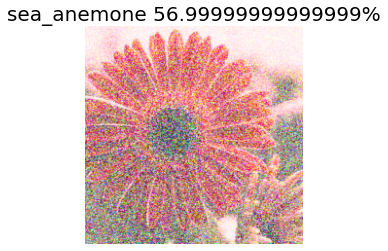

In [11]:
label = decode_predictions(classifier.predict(input_batch1))
label = label[0][0]

preds = classifier.predict(input_batch1)

accuracy = np.max(softmax_activation(preds), axis=1)
accuracy = round(accuracy[0], 2)      

plt.imshow(adv_input)
plt.title(label[1] + " " + format(accuracy * 100) + "%", fontsize=20)
plt.axis('off')
plt.show()

## Uniform Noise Attack

(-0.5, 499.5, 385.5, -0.5)

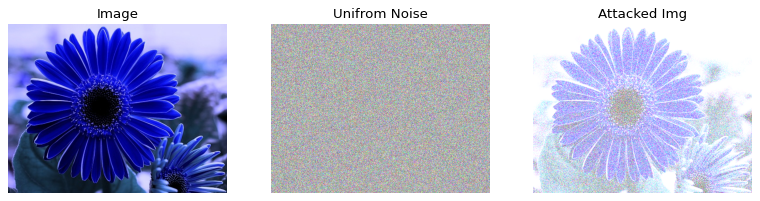

In [12]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(331)
plt.imshow(img)
plt.title('Image')
plt.axis('off')

#plt.resize(img,height=33,width=45)

uniform = np.random.uniform(100,250,img.size)
uniform_noise = uniform.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
#uniform_noise = cv2.randu(uniform_noise,0,255)
plt.subplot(332)
plt.imshow(uniform_noise)
plt.title('Unifrom Noise')
plt.axis('off')

#uniform_noise = (uniform_noise*0.5).astype(np.uint8)
noisy_image2 = cv2.add(img,uniform_noise)

plt.subplot(333)
plt.imshow(noisy_image2)
plt.title('Attacked Img')
plt.axis('off')

In [13]:
color_coverted = cv2.cvtColor(noisy_image2, cv2.COLOR_BGR2RGB)
adv_image = Image.fromarray(color_coverted)

input_tensor = preprocess(adv_image)
input_batch2 = input_tensor.unsqueeze(0).numpy().astype(np.float32)
adv_input = input_batch2[0].transpose((1,2,0))


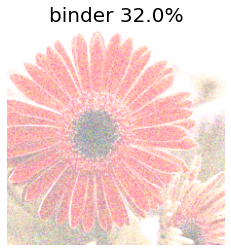

In [14]:
label = decode_predictions(classifier.predict(input_batch2))
label = label[0][0]

preds = classifier.predict(input_batch2)

accuracy = np.max(softmax_activation(preds), axis=1)
accuracy = round(accuracy[0], 2)      

plt.imshow(adv_input)
plt.title(label[1] + " " + format(accuracy * 100) + "%", fontsize=20)
plt.axis('off')
plt.show()

## Correlated Gaussian noise

error: ignored

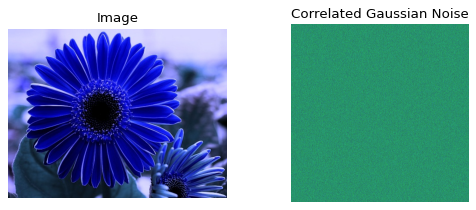

In [15]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(331)
plt.imshow(img)
plt.title('Image')
plt.axis('off')


# Generate correlated Gaussian noise
mean = [40, 1000, 90]
cov = [[10, 0, 0], [0, 3000, 0],[0, 0, 4000]]
cov_gauss = np.random.multivariate_normal(mean, cov,8156736)

cgauss_noise = cov_gauss.reshape(2856,2856,3).astype('uint8')
plt.subplot(332)
plt.imshow(cgauss_noise)
plt.title('Correlated Gaussian Noise')
plt.axis('off')


# Add the correlated Gaussian noise to the image
noisy_image3 = cv2.add(img,cgauss_noise)
plt.subplot(333)
plt.imshow(noisy_image3)
plt.title('Attacked Img')
plt.axis('off')

In [ ]:
color_coverted = cv2.cvtColor(noisy_image3, cv2.COLOR_BGR2RGB)
adv_image = Image.fromarray(color_coverted)

input_tensor = preprocess(adv_image)
input_batch3 = input_tensor.unsqueeze(0).numpy().astype(np.float32)
adv_input = input_batch3[0].transpose((1,2,0))


In [ ]:
label = decode_predictions(classifier.predict(input_batch3))
label = label[0][0]

preds = classifier.predict(input_batch3)

accuracy = np.max(softmax_activation(preds), axis=1)
accuracy = round(accuracy[0], 2)      

plt.imshow(adv_input)
plt.title(label[1] + " " + format(accuracy * 100) + "%", fontsize=20)
plt.axis('off')
plt.show()